In [160]:
import pandas as pd
import numpy as np
from pylab import *
import scipy.stats as stats
from scipy.stats import kurtosis

In [2]:
df= pd.read_pickle("../data/clean_rows_df.pkl")  
df.head()

,VoltageCurve,CurrentCurve,spotName
TimeStamp,,,
2019-11-07 12:29:06,"[132, 744, 1299, 1663, 1894, 2002, 2068, 2110,...","[311, 1990, 3577, 4759, 5599, 6190, 6594, 6999...",60000_0_00
2019-11-07 12:29:26,"[136, 752, 1308, 1675, 1923, 2068, 2128, 2180,...","[301, 1961, 3470, 4527, 5432, 6066, 6489, 6911...",60000_0_00
2019-11-07 12:29:26,"[139, 757, 1292, 1655, 1885, 2042, 2099, 2099,...","[333, 2058, 3663, 4814, 5661, 6388, 6842, 7084...",60000_0_00
2019-11-07 12:29:30,"[133, 743, 1286, 1645, 1887, 2046, 2104, 2104,...","[307, 2031, 3632, 4802, 5695, 6434, 6865, 7142...",60000_0_00
2019-11-07 12:29:32,"[137, 755, 1313, 1683, 1906, 2043, 2147, 2189,...","[302, 1995, 3508, 4596, 5382, 5987, 6562, 6955...",60000_0_00


In [3]:
df.reset_index(inplace=True)
df.set_index(["spotName","TimeStamp"],inplace=True)

In [4]:
exploded_voltage=pd.DataFrame(df.VoltageCurve.tolist(), index= df.index)

In [6]:
curva=exploded_voltage.iloc[1]
#curva=curva[pd.notnull(curva)]

indice del primo valore per cui l'inclinazione della curva inizia a diventare negativa
Escludere i valori precedenti a questo indice per analizzare la curva

In [7]:
#indice del primo valore per cui l'inclinazione della curva diventa negativa
#position=curva.diff()[curva.diff()==next(x for x in curva.diff() if x < 0)].index[0]
#curva_new è la curva senza il primo picco
#curva_new=curva.iloc[position:]
#plot(curva_new)

In [14]:
exploded_voltage_diff=exploded_voltage.diff(axis=1)
exploded_voltage_diff=exploded_voltage_diff.drop(columns=0,axis=1)

In [15]:
exploded_voltage_diff.iloc[:3].apply(lambda x: x.gt(0).idxmin(),axis=1)

spotName    TimeStamp          
60000_0_00  2019-11-07 12:29:06    8
            2019-11-07 12:29:26    8
            2019-11-07 12:29:26    7
dtype: int64

In [16]:
exploded_voltage_diff["posizione"]=exploded_voltage_diff.apply(lambda x: x.gt(0).idxmin(),axis=1)

In [65]:
(exploded_voltage_diff.iloc[:3].apply(lambda x: x[x.posizione:],axis=1))

8     9    10    11    12    13    14  \
spotName   TimeStamp                                                       
60000_0_00 2019-11-07 12:29:06 -34.0 -41.0 -17.0 -41.0 -41.0   8.0  -8.0   
           2019-11-07 12:29:26   0.0 -77.0 -35.0   9.0 -34.0 -26.0  34.0   
           2019-11-07 12:29:26   0.0 -32.0 -58.0 -41.0  -9.0 -41.0   9.0   

                                  15    16    17  ...  616  617  618  619  \
spotName   TimeStamp                              ...                       
60000_0_00 2019-11-07 12:29:06 -17.0  17.0  16.0  ...  NaN  NaN  NaN  NaN   
           2019-11-07 12:29:26  17.0 -17.0  17.0  ...  NaN  NaN  NaN  NaN   
           2019-11-07 12:29:26  16.0 -41.0  -8.0  ...  NaN  NaN  NaN  NaN   

                                620  621  622  623  posizione    7  
spotName   TimeStamp                                                
60000_0_00 2019-11-07 12:29:06  NaN  NaN  NaN  NaN        8.0  NaN  
           2019-11-07 12:29:26  NaN  NaN  NaN  NaN        8.0  NaN  
           2019-11-07 12:29:26  NaN  NaN  NaN  NaN        7.0  0.0  

[3 rows x 618 columns]

Non so come fare a rimuovere i primi n valori sulla base di posizione!!!!!

--> faccio una media di posizione arrotondata per eccesso e rimuovo le prime x=media(posizione) colonne del dataframe.

In [75]:
math.ceil(exploded_voltage_diff.posizione.mean())

8

In [73]:
curve_ML=exploded_voltage.iloc[: , math.ceil(exploded_voltage_diff.posizione.mean()):]

Calcolo le caratteristiche delle curve su cui poi applicare algoritmi di ML:
- Media, Max, Min, Range, Varianza, Derivata, Curtosi...

In [187]:
curve_ML["media"]=curve_ML.iloc[:,:616].apply(mean,axis=1)
curve_ML["mediana"]=curve_ML.iloc[:,:616].apply(lambda x : median(x[x.notna()]),axis=1)
curve_ML["max"]=curve_ML.iloc[:,:616].apply(max,axis=1)
curve_ML["min"]=curve_ML.iloc[:,:616].apply(min,axis=1)
curve_ML["varianza"]=curve_ML.iloc[:,:616].apply(var,axis=1)

In [193]:
curve_ML["mediana"]=curve_ML.iloc[:,:616].apply(lambda x : median(x[x.notna()]),axis=1)

c:\Users\dvd_m\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dvd_m\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [190]:
#lunghezza come numero di valori non Null
curve_ML["lunghezza"]=curve_ML.iloc[:,:616].apply(lambda x: len(x[x.notna()]),axis=1)

In [188]:
#range intesa come max-min
curve_ML["range"]=curve_ML.iloc[:,:616].apply(lambda x: x.max()-x.min(),axis=1)

In [189]:
#calcolo della derivata come delta(y)/delta(x): ovvero range/lunghezza lista
curve_ML["derivata"]=curve_ML.apply(lambda x: x.range/len(x[:616][x[:616].notna()]),axis=1)

In [171]:
#curtosi
curve_ML["kurtosis"]=curve_ML.iloc[:,:616].apply(lambda x: kurtosis(x[x.notna()]),axis=1)

c:\Users\dvd_m\anaconda3\lib\site-packages\scipy\stats\stats.py:1216: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
c:\Users\dvd_m\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\dvd_m\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dvd_m\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [194]:
final_ML=curve_ML.iloc[:,616:]
final_ML.head()

media     max     min  range  \
spotName   TimeStamp                                                 
60000_0_00 2019-11-07 12:29:06  1475.613281  2085.0  1199.0  886.0   
           2019-11-07 12:29:26  1691.521635  2180.0  1393.0  787.0   
           2019-11-07 12:29:26  1683.105392  2099.0  1383.0  716.0   
           2019-11-07 12:29:30  1657.260143  2129.0  1353.0  776.0   
           2019-11-07 12:29:32  1696.208738  2155.0  1399.0  756.0   

                                derivative  lunghezza  kurtosis  \
spotName   TimeStamp                                              
60000_0_00 2019-11-07 12:29:06    1.730469        512 -1.339670   
           2019-11-07 12:29:26    1.891827        416 -1.110572   
           2019-11-07 12:29:26    1.754902        408 -1.325995   
           2019-11-07 12:29:30    1.852029        419 -1.196977   
           2019-11-07 12:29:32    1.834951        412 -1.182049   

                                     varianza  mediana  derivata  
spotName   TimeStamp                                              
60000_0_00 2019-11-07 12:29:06  106775.116074   1249.0  1.730469  
           2019-11-07 12:29:26   56225.182224   1624.0  1.891827  
           2019-11-07 12:29:26   47841.104089   1622.0  1.754902  
           2019-11-07 12:29:30   53271.247361   1603.0  1.852029  
           2019-11-07 12:29:32   51611.204001   1639.5  1.834951

Plot sulla base di spot e datetime

In [ ]:
60074_0_00	2019-11-08 17:51:29

C:\Users\dvd_m\AppData\Local\Temp/ipykernel_3040/3030516330.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  curva=curve_ML.loc[('60074_0_00', '2019-11-08 17:51:29'), :].iloc[:,:616]


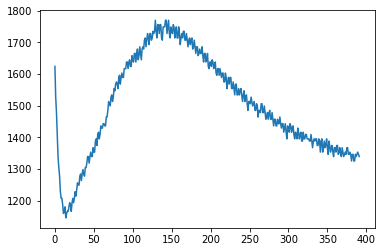

In [174]:
curva=curve_ML.loc[('60074_0_00', '2019-11-08 17:51:29'), :].iloc[:,:616]
plot(curva.values[0])